# Solving Simple Mass-Spring Damper System Using Sympy

Find the response for a SDOF mass-spring damper system with the following properties: m = 10 kg, k = 4000 N/m c = 20 Ns/m. For the given initial conditions: $x_0$ = 0.02 m and $\dot{x_0}$ = 10 m/s For the following:

(a) $F_{ext}$ = 0 N

(b) $F_{ext}$ = 100 N

(c) $F_{ext}$ = 100sin(t) N

In [1]:
import numpy as np
import sympy as sm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%matplotlib notebook

## 1. Defining All Contants, Variables, Functions and Derivatives

In [2]:
# Define constsants
m, c, k = sm.symbols('m, c, k', real=True, positive=True)

# Define variables
t = sm.symbols('t', real=True, positive=True)

# Define functions
x = sm.Function('x', complex=True)(t)
F_ext = sm.Function('F_{ext}', real=True)(t)

# Define derivatives
dx_dt = sm.diff(x, t, 1) # First derivative
ddx_dtt = sm.diff(x, t, 2) # Second derivative
ddx_dtt

Derivative(x(t), (t, 2))

## 2. Building the Equation

In [3]:
# Creating lhs and rhs of equation
lhs = m*ddx_dtt + c*dx_dt + k*x
rhs = F_ext

#Combine lhs and rhs into single equation
Eq = sm.Eq(lhs, rhs)
Eq

Eq(c*Derivative(x(t), t) + k*x(t) + m*Derivative(x(t), (t, 2)), F_{ext}(t))

## 3. Specify Initial Conditions

In [4]:
# Specifying initial conditions (see documentation for syntax)
initial_conditions = {
    x.subs(t, 0): 0.02, # x(0) = 0.02 m
    dx_dt.subs(t, 0): 10 # dx_dt(0) = 10 m/s
}

## 4. Solving the Differential Equation

In [5]:
# Solving the differential Equation

sol = sm.dsolve(Eq, x, ics=initial_conditions)
sol # Solution with arbitrary constants

Eq(x(t), (-0.005*c/sqrt(0.25*c**2 - k*m) - 5.0*m/sqrt(0.25*c**2 - k*m) + 0.01 + 0.5*Integral(F_{ext}(t)*exp(0.5*c*t/m)*exp(1.0*t*sqrt(0.25*c**2 - k*m)/m), (t, 0))/sqrt(0.25*c**2 - k*m))*exp(-t*(c + sqrt(c**2 - 4*k*m))/(2*m)) + (0.005*c/sqrt(0.25*c**2 - k*m) + 5.0*m/sqrt(0.25*c**2 - k*m) + 0.01 - 0.5*Integral(F_{ext}(t)*exp(0.5*c*t/m)*exp(-1.0*t*sqrt(0.25*c**2 - k*m)/m), (t, 0))/sqrt(0.25*c**2 - k*m))*exp(t*(-c + sqrt(c**2 - 4*k*m))/(2*m)) + exp(t*(-c + sqrt(c**2 - 4*k*m))/(2*m))*Integral(F_{ext}(t)*exp(c*t/(2*m))*exp(-t*sqrt(c**2 - 4*k*m)/(2*m)), t)/sqrt(c**2 - 4*k*m) - exp(-t*(c + sqrt(c**2 - 4*k*m))/(2*m))*Integral(F_{ext}(t)*exp(c*t/(2*m))*exp(t*sqrt(c**2 - 4*k*m)/(2*m)), t)/sqrt(c**2 - 4*k*m))

## 5. Substitute Given Constants

### a) For  $F_{ext}$ = 0 N

In [6]:
#Solution for free vibration

new_F_ext_a = 0 # [N] External Force

m_val = 10 # [kg] Mass m
k_val = 4000 # [N/m] Stiffness of the spring k
c_val = 20 # Damping factor c

sol_subs_a = sol.subs([(F_ext, new_F_ext_a), (m, m_val), (k, k_val), (c, c_val)]).simplify()
sol_subs_a

Eq(x(t), 0.00012531328320802*((79.8 - 2001.49343241491*I)*exp(sqrt(399)*I*t) + (79.8 + 2001.49343241491*I)*exp(-sqrt(399)*I*t))*exp(-t))

### b) For  $F_{ext}$ = 100 N

In [7]:
# Solution for constant force

new_F_ext_b = 100 # [N] External Force

sol_subs_b = sol.subs([(F_ext, new_F_ext_b), (m, m_val), (k, k_val), (c, c_val)]).simplify()
sol_subs_b

Eq(x(t), ((79.8 - 2001.49343241491*I + 1997.49843554382*I*(0.0025 + 0.0499374608885955*I) + 100*sqrt(399)*exp(t)/(sqrt(399)*exp(sqrt(399)*I*t) + I*exp(sqrt(399)*I*t)))*exp(t*(1 + sqrt(399)*I)) + (100*sqrt(399)*exp(t)*exp(sqrt(399)*I*t)/(sqrt(399) - I) + 79.8 - 1997.49843554382*I*(0.0025 - 0.0499374608885955*I) + 2001.49343241491*I)*exp(t*(1 - sqrt(399)*I)))*exp(-2*t)/7980)

### c) For  $F_{ext}$ = 100sin(t) N

In [8]:
# Solution for constant force

new_F_ext_c = 100*sm.sin(t) # [N] External Force

sol_subs_c = sol.subs([(F_ext, new_F_ext_c), (m, m_val), (k, k_val), (c, c_val)]).simplify()
sol_subs_c

Eq(x(t), ((-100*sqrt(399)*I*(sqrt(399)*exp(t)*sin(t)/(2*sqrt(399)*exp(sqrt(399)*I*t) - 397*I*exp(sqrt(399)*I*t)) + I*exp(t)*sin(t)/(2*sqrt(399)*exp(sqrt(399)*I*t) - 397*I*exp(sqrt(399)*I*t)) - I*exp(t)*cos(t)/(2*sqrt(399)*exp(sqrt(399)*I*t) - 397*I*exp(sqrt(399)*I*t))) + 79.8 - 2001.49343241491*I + 1997.49843554382*I*(0.002493640275117 - 0.000250934133418396*I))*exp(t*(1 + sqrt(399)*I)) + (100*sqrt(399)*I*(sqrt(399)*exp(t)*exp(sqrt(399)*I*t)*sin(t)/(2*sqrt(399) + 397*I) - I*exp(t)*exp(sqrt(399)*I*t)*sin(t)/(2*sqrt(399) + 397*I) + I*exp(t)*exp(sqrt(399)*I*t)*cos(t)/(2*sqrt(399) + 397*I)) + 79.8 - 1997.49843554382*I*(0.002493640275117 + 0.000250934133418396*I) + 2001.49343241491*I)*exp(t*(1 - sqrt(399)*I)))*exp(-2*t)/7980)

## 6. Convert Symbolic Solution to a Numeric Solution

In [23]:
# Converting to a numerical solution

solution_a = sm.lambdify(t, sol_subs_a.rhs)
solution_b = sm.lambdify(t, sol_subs_b.rhs)
solution_c = sm.lambdify(t, sol_subs_c.rhs)

## 7. Display the Results

<IPython.core.display.Javascript object>


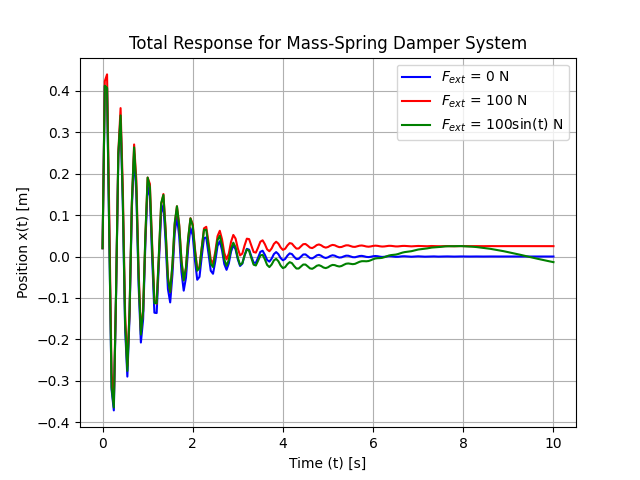

In [29]:
# Display the results

t_num = np.linspace(0, 10, 201) # Points at which we want to evaluate the solution x(t), here from 0 to 10 [s]

x_a = np.real(solution_a(t_num))# We use our lambdified solution and apply a numpy array on it (Extracting only the real part for example)
x_b = np.real(solution_b(t_num))
x_c = np.real(solution_c(t_num))

plt.plot(t_num, x_a, '-', color='blue', label='$F_{ext}$ = 0 N')
plt.plot(t_num, x_b, '-', color='red', label='$F_{ext}$ = 100 N')
plt.plot(t_num, x_c, '-', color='green', label='$F_{ext}$ = 100sin(t) N')

plt.title("Total Response for Mass-Spring Damper System")
plt.xlabel("Time (t) [s]")
plt.ylabel("Position x(t) [m]")
plt.legend()
plt.grid()

<IPython.core.display.Javascript object>


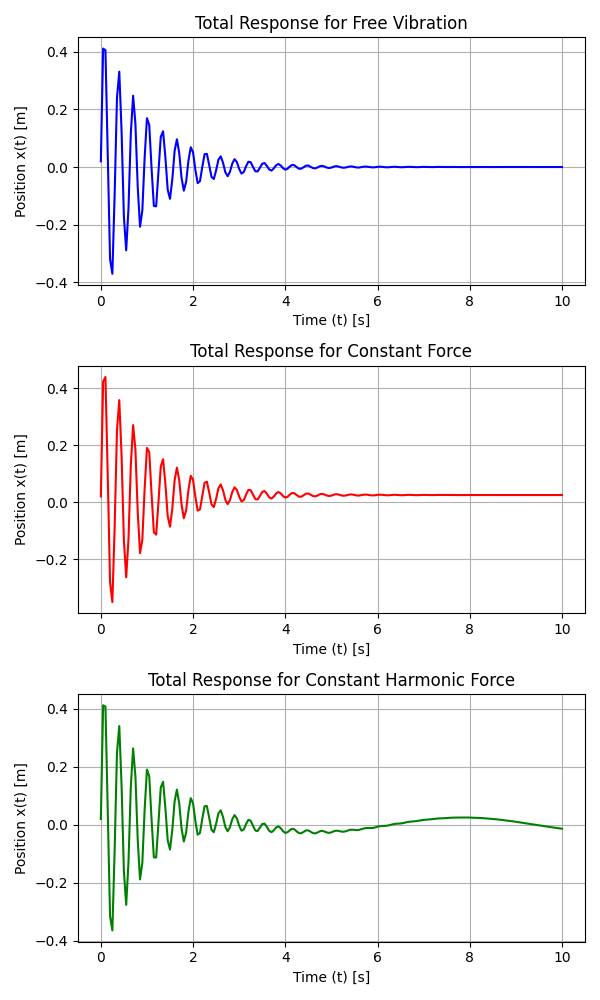

In [30]:
fig, axes = plt.subplots(3, 1,figsize=(6,10))

# Free Vibration
axes[0].plot(t_num, x_a, '-', color='blue', label='$F_{ext}$ = 0 N')
axes[0].set_title('Total Response for Free Vibration')
axes[0].set_xlabel('Time (t) [s]')
axes[0].set_ylabel('Position x(t) [m]')
axes[0].grid()

# Constant Force
axes[1].plot(t_num, x_b, '-', color='red', label='$F_{ext}$ = 0 N')
axes[1].set_title('Total Response for Constant Force')
axes[1].set_xlabel('Time (t) [s]')
axes[1].set_ylabel('Position x(t) [m]')
axes[1].grid()

# Constant Harmonic Force
axes[2].plot(t_num, x_c, '-', color='green', label='$F_{ext}$ = 0 N')
axes[2].set_title('Total Response for Constant Harmonic Force')
axes[2].set_xlabel('Time (t) [s]')
axes[2].set_ylabel('Position x(t) [m]')
axes[2].grid()

plt.tight_layout()
plt.show()

### Animated Plots

<IPython.core.display.Javascript object>


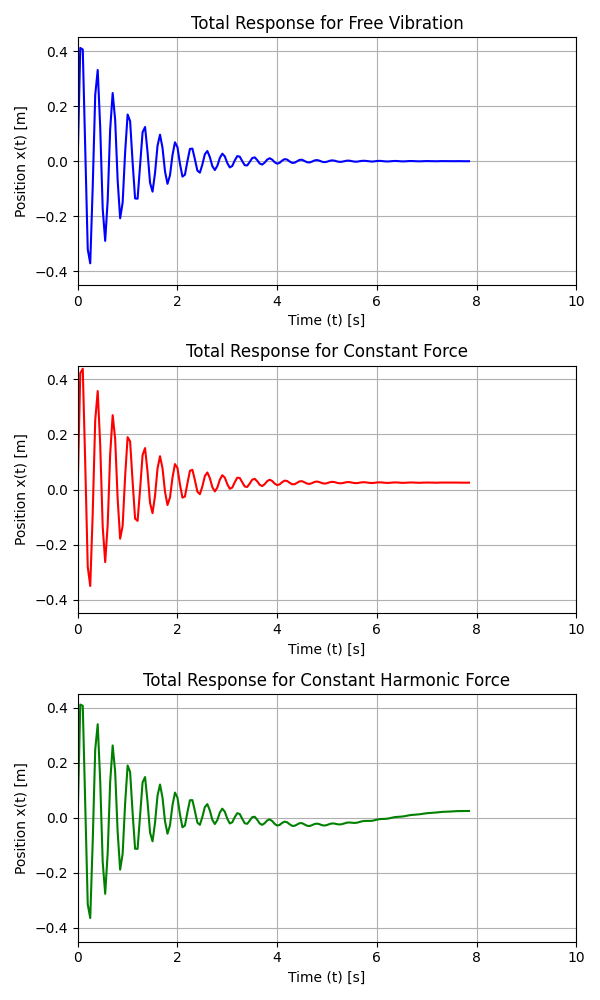

In [36]:
fig, axis = plt.subplots(3, 1, figsize=(6,10))

# Solution (a)
animated_a, = axis[0].plot([], [], color='blue')

axis[0].set_xlim([min(t_num), max(t_num)])
axis[0].set_ylim([-0.45, 0.45])
axis[0].set_title('Total Response for Free Vibration')
axis[0].set_xlabel('Time (t) [s]')
axis[0].set_ylabel('Position x(t) [m]')
axis[0].grid()

# Solution (b)
animated_b, = axis[1].plot([], [], color='red')

axis[1].set_xlim([min(t_num), max(t_num)])
axis[1].set_ylim([-0.45, 0.45])
axis[1].set_title('Total Response for Constant Force')
axis[1].set_xlabel('Time (t) [s]')
axis[1].set_ylabel('Position x(t) [m]')
axis[1].grid()

# Solution (c)
animated_c, = axis[2].plot([], [], color='green')

axis[2].set_xlim([min(t_num), max(t_num)])
axis[2].set_ylim([-0.45, 0.45])
axis[2].set_title('Total Response for Constant Harmonic Force')
axis[2].set_xlabel('Time (t) [s]')
axis[2].set_ylabel('Position x(t) [m]')
axis[2].grid()

def update(frame):
    
    animated_a.set_data(t_num[:frame], x_a[:frame])
    animated_b.set_data(t_num[:frame], x_b[:frame])
    animated_c.set_data(t_num[:frame], x_c[:frame])
    
    return animated_a, animated_b, animated_c

animation = FuncAnimation(
                    fig=fig,
                    func=update,
                    frames=len(t_num),
                    interval=25,
                    blit=True
                    )

plt.tight_layout()
plt.show()

## Combining Regular Plots with Animated Plots

<IPython.core.display.Javascript object>


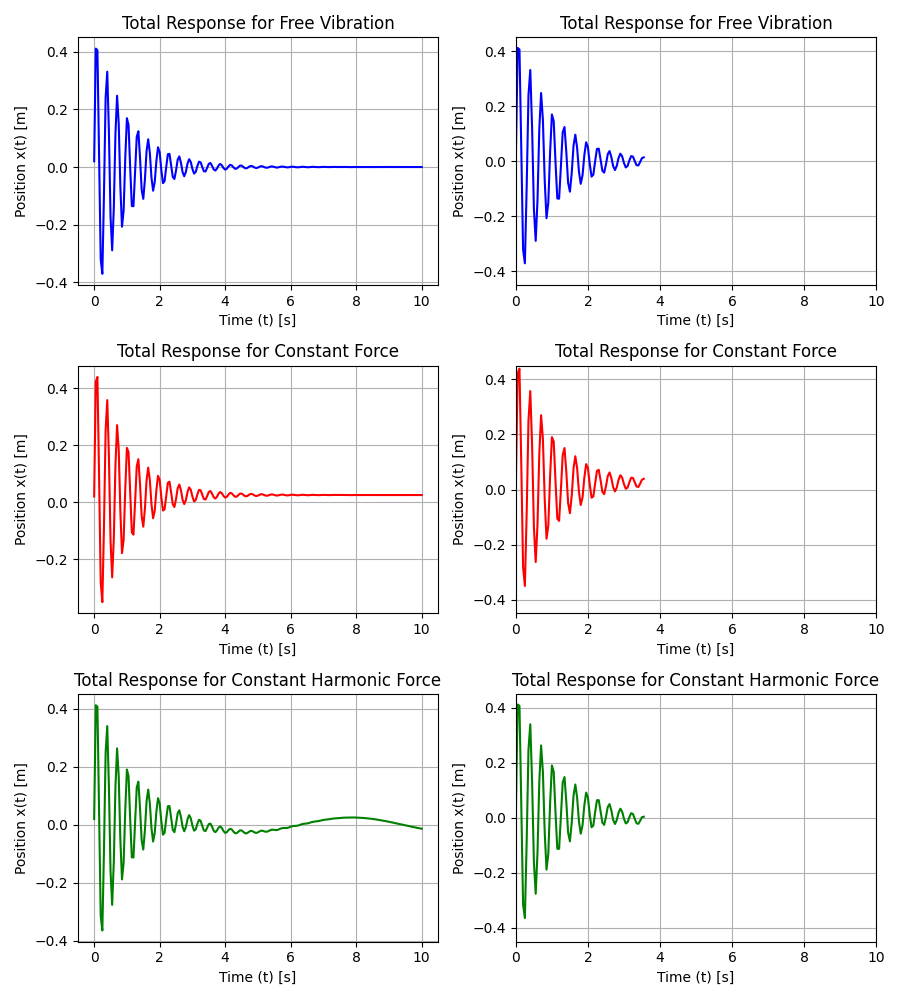

In [81]:
fig, axis = plt.subplots(3, 2, figsize=(9, 10))

# Free Vibration
axis[0, 0].plot(t_num, x_a, '-', color='blue', label='$F_{ext}$ = 0 N')
axis[0, 0].set_title('Total Response for Free Vibration')
axis[0, 0].set_xlabel('Time (t) [s]')
axis[0, 0].set_ylabel('Position x(t) [m]')
axis[0, 0].grid()

animated_a, = axis[0, 1].plot([], [], color='blue')

axis[0, 1].set_xlim([min(t_num), max(t_num)])
axis[0, 1].set_ylim([-0.45, 0.45])
axis[0, 1].set_title('Total Response for Free Vibration')
axis[0, 1].set_xlabel('Time (t) [s]')
axis[0, 1].set_ylabel('Position x(t) [m]')
axis[0, 1].grid()

# Constant Force
axis[1, 0].plot(t_num, x_b, '-', color='red', label='$F_{ext}$ = 0 N')
axis[1, 0].set_title('Total Response for Constant Force')
axis[1, 0].set_xlabel('Time (t) [s]')
axis[1, 0].set_ylabel('Position x(t) [m]')
axis[1, 0].grid()

animated_b, = axis[1, 1].plot([], [], color='red')

axis[1, 1].set_xlim([min(t_num), max(t_num)])
axis[1, 1].set_ylim([-0.45, 0.45])
axis[1, 1].set_title('Total Response for Constant Force')
axis[1, 1].set_xlabel('Time (t) [s]')
axis[1, 1].set_ylabel('Position x(t) [m]')
axis[1, 1].grid()

# Constant Harmonic Force
axis[2, 0].plot(t_num, x_c, '-', color='green', label='$F_{ext}$ = 0 N')
axis[2, 0].set_title('Total Response for Constant Harmonic Force')
axis[2, 0].set_xlabel('Time (t) [s]')
axis[2, 0].set_ylabel('Position x(t) [m]')
axis[2, 0].grid()

animated_c, = axis[2, 1].plot([], [], color='green')

axis[2, 1].set_xlim([min(t_num), max(t_num)])
axis[2, 1].set_ylim([-0.45, 0.45])
axis[2, 1].set_title('Total Response for Constant Harmonic Force')
axis[2, 1].set_xlabel('Time (t) [s]')
axis[2, 1].set_ylabel('Position x(t) [m]')
axis[2, 1].grid()

def update(frame):
    
    animated_a.set_data(t_num[:frame], x_a[:frame])
    animated_b.set_data(t_num[:frame], x_b[:frame])
    animated_c.set_data(t_num[:frame], x_c[:frame])
    
    return animated_a, animated_b, animated_c

animation = FuncAnimation(
                    fig=fig,
                    func=update,
                    frames=len(t_num),
                    interval=25,
                    blit=True
                    )

plt.tight_layout()
animation.save("finalplots.gif")
plt.show()